In [1]:
import os

os.chdir("../..")

import pandas as pd
import MLUtils.evaluation.Clustering as ClustersUtils

from sklearn.datasets import make_blobs

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

%load_ext autoreload
%autoreload 2

# Kmeans

In [ ]:
ClustersUtils.KMEANS_KWARG

In [ ]:
clusters_dict = ClustersUtils.evaluate_kmeans(features=df, kmeans_kwargs=ClustersUtils.KMEANS_KWARG, clusters_range=range(2, 21), njobs=-1)

In [ ]:
ClustersUtils.decision_tree_analysis(data=df, labels=clusters_dict[4].labels_)

In [ ]:
ClustersUtils.plot_cluster_2d(df, clusters_dict[4].labels_, n_clusters=4)

# GMM

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:04<00:00,  7.99it/s]


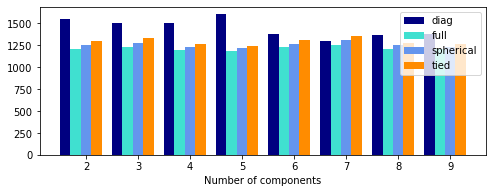

Minimum bic score is for {'n_components': 4, 'covariance_type': 'tied'}


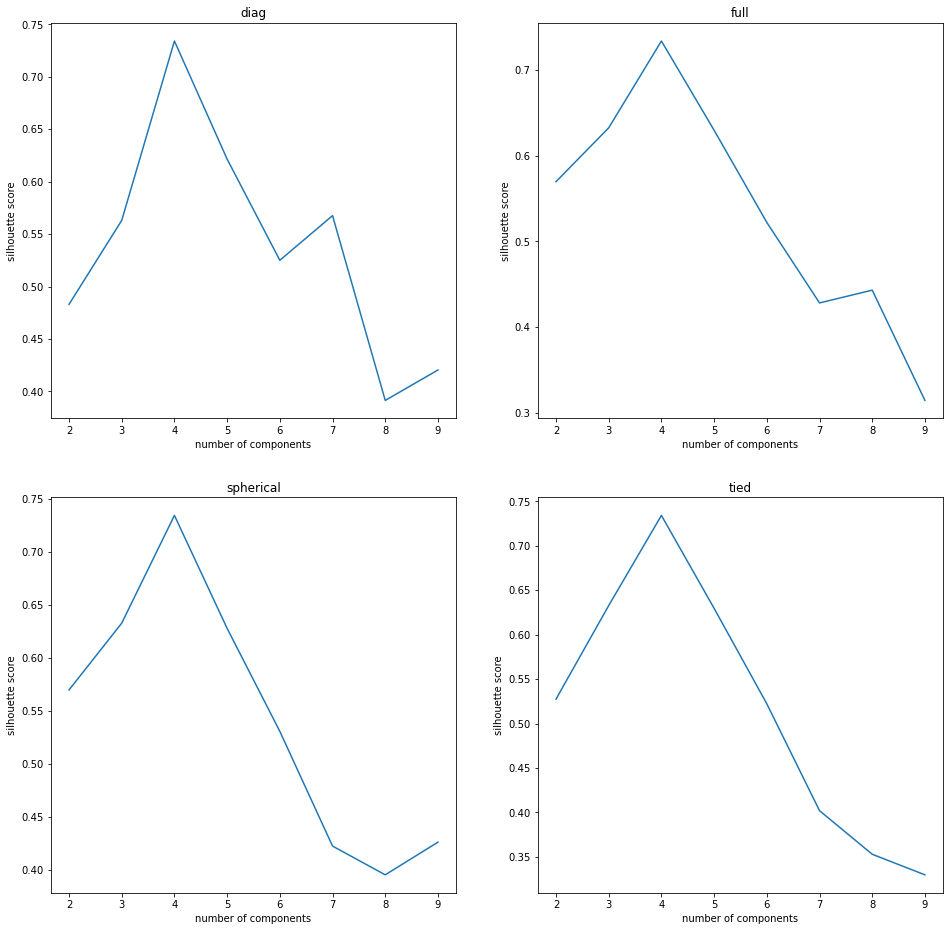

In [8]:
gmms_dict = ClustersUtils.evaluate_gmm(features=df, gmm_kwargs={}, components_range=range(2,10), njobs=1)

In [12]:
ClustersUtils.decision_tree_analysis(data=df, labels=gmms_dict[(4, 'tied')][1])

,cluster 0 features,cluster 0 features scores,cluster 1 features,cluster 1 features scores,cluster 2 features,cluster 2 features scores,cluster 3 features,cluster 3 features scores
0,var2,0.973856,var2,1.0,var2,0.6215,var2,0.666667
1,var1,0.026144,var1,0.0,var1,0.3785,var1,0.333333


1


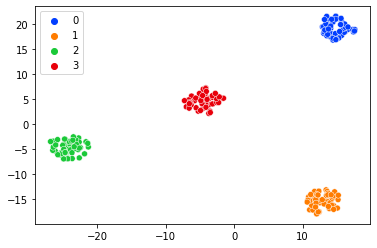

In [23]:
f, ax = plt.subplots()
ClustersUtils.plot_cluster_2d(df, gmms_dict[(4, 'tied')][1], n_clusters=4, ax=ax)